# Рубежный контроль №2
## Вариант №5


In [1]:
import random as rd

Variant = 5
rd.seed(Variant+69)

Numbers_of_problems = [rd.sample(range(4),1)[0]+1, rd.sample(range(4),1)[0]+1]
Numbers_of_problems

[1, 3]

## Задание 1.1

С использованием анонимного отображения в память прочитать содержимой текстового файла, с использованием библиотеки ncurses вывести его посимвольно на экран, каждый символ должен выводиться разным цветом из пяти цветов: 1 цвет, 2 цвет,..., 5 цвет, и делее по кругу 1 цвет, 2 цвет,..., 5 цвет и т.д.

```ASM
format ELF64
public _start

extrn initscr
extrn start_color
extrn init_pair
extrn noecho
extrn raw
extrn curs_set
extrn stdscr
extrn addch
extrn refresh
extrn endwin
extrn getch
extrn timeout
extrn attron
extrn attroff

section '.data' writeable
    stat_buf rb 144
    file_fd  dq 0
    file_size dq 0
    mem_ptr  dq 0
    char_buf dq 0

section '.text' executable
_start:
    mov rax, [rsp]
    cmp rax, 2
    jl exit_app

    mov rbx, [rsp + 16]

    call initscr
    call start_color

    xor rdi, rdi
    call curs_set
    call noecho
    call raw

    mov rdi, 1
    mov rsi, 1
    mov rdx, 0
    call init_pair

    mov rdi, 2
    mov rsi, 2
    mov rdx, 0
    call init_pair

    mov rdi, 3
    mov rsi, 3
    mov rdx, 0
    call init_pair

    mov rdi, 4
    mov rsi, 4
    mov rdx, 0
    call init_pair

    mov rdi, 5
    mov rsi, 5
    mov rdx, 0
    call init_pair

    mov rax, 2
    mov rdi, rbx
    xor rsi, rsi
    xor rdx, rdx
    syscall

    cmp rax, 0
    jl exit_ncurses
    mov [file_fd], rax

    mov rax, 5
    mov rdi, [file_fd]
    mov rsi, stat_buf
    syscall

    mov rax, qword [stat_buf + 48]
    mov [file_size], rax

    test rax, rax
    jz close_file

    mov rax, 9
    mov rdi, 0
    mov rsi, [file_size]
    mov rdx, 3
    mov r10, 34
    mov r8, -1
    mov r9, 0
    syscall

    cmp rax, -1
    je close_file
    mov [mem_ptr], rax

    mov rax, 0
    mov rdi, [file_fd]
    mov rsi, [mem_ptr]
    mov rdx, [file_size]
    syscall

    xor r12, r12
    mov r13, [file_size]
    mov r14, [mem_ptr]

printLoop:
    cmp r12, r13
    jge waitKey

    mov rax, r12
    xor rdx, rdx
    mov rbx, 5
    div rbx
    inc rdx

    mov rdi, rdx
    shl rdi, 8
    call attron

    movzx rdi, byte [r14 + r12]
    call addch

    call refresh

    mov rdi, 50
    call timeout

    call getch

    cmp rax, 'q'
    je exit_resources
    cmp rax, 'Q'
    je exit_resources

    inc r12
    jmp printLoop

waitKey:
    mov rdi, -1
    call timeout
    call getch

exit_resources:
    mov rax, 11
    mov rdi, [mem_ptr]
    mov rsi, [file_size]
    syscall

close_file:
    mov rax, 3
    mov rdi, [file_fd]
    syscall

exit_ncurses:
    call endwin

exit_app:
    mov rax, 60
    xor rdi, rdi
    syscall
```

```txt
aldalsdjajdjlkasjdlaldjasldlasdjlajdljlkcnlkznxckznxkcnxznc;n;zxncllx;zc;mzxl;ck;lmzxcml;zxmcmm;lxzmcl;mzxl;cml;zxmlcml;zxmcm;lzxmcl;mzxl;mcl;zxml;cml;zxmcl;mzx;lcml;zxmcl;mzxl;mcl;zmxl;cml;zxmcl;zxlcm;lzxmcl;mzx;lcml;zxmlc;m;lzxmclzxm;lcmzl;mc;klzxmnZ
klnacnsa;naxmas[xj[paskx[pkaspkxpaskpxkpaskxasxk';askxpsakpx[kas[xmp[amspxaspxmspmpxmp[asmxp[asmxp[msapx[mapsmxpasmpxmpsamxpasmxp[asmpxmasl;xmas;lmxlasmx;lmas;lxml;asmxl;masl;xml;amslxm;lams;lxmas;lxm;alsmx;lasmx;lasmxaslxm;lasmxaslxmsamx;l]]]]]]]]]]]
klnacnsa;naxmas[xj[paskx[pkaspkxpaskpxkpaskxasxk';askxpsakpx[kas[xmp[amspxaspxmspmpxmp[asmxp[asmxp[msapx[mapsmxpasmpxmpsamxpasmxp[asmpxmasl;xmas;lmxlasmx;lmas;lxml;asmxl;masl;xml;amslxm;lams;lxmas;lxm;alsmx;lasmx;lasmxaslxm;lasmxaslxmsamx;l]]]]]]]]]]]
klnacnsa;naxmas[xj[paskx[pkaspkxpaskpxkpaskxasxk';askxpsakpx[kas[xmp[amspxaspxmspmpxmp[asmxp[asmxp[msapx[mapsmxpasmpxmpsamxpasmxp[asmpxmasl;xmas;lmxlasmx;lmas;lxml;asmxl;masl;xml;amslxm;lams;lxmas;lxm;alsmx;lasmx;lasmxaslxm;lasmxaslxmsamx;l]]]]]]]]]]]
klnacnsa;naxmas[xj[paskx[pkaspkxpaskpxkpaskxasxk';askxpsakpx[kas[xmp[amspxaspxmspmpxmp[asmxp[asmxp[msapx[mapsmxpasmpxmpsamxpasmxp[asmpxmasl;xmas;lmxlasmx;lmas;lxml;asmxl;masl;xml;amslxm;lams;lxmas;lxm;alsmx;lasmx;lasmxaslxm;lasmxaslxmsamx;l]]]]]]]]]]]
klnacnsa;naxmas[xj[paskx[pkaspkxpaskpxkpaskxasxk';askxpsakpx[kas[xmp[amspxaspxmspmpxmp[asmxp[asmxp[msapx[mapsmxpasmpxmpsamxpasmxp[asmpxmasl;xmas;lmxlasmx;lmas;lxml;asmxl;masl;xml;amslxm;lams;lxmas;lxm;alsmx;lasmx;lasmxaslxm;lasmxaslxmsamx;l]]]]]]]]]]]
```



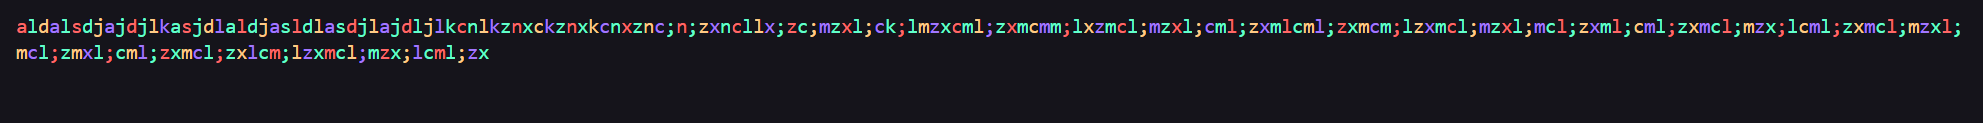

## Задание 2.3

В программе на ассемблере заполнить массив числами 1, 2, 3,... в количестве  N  (вводится параметром командной строки), создать два дочерних процесса (clone). Один дочерний процесс должен увеличить на единицу все четные числа, другой - уменьшить на единицу все нечетные. По окончанию работы дочерных процессов родительский процесс должен вывести получившийся массив на экран.

```ASM
format ELF64
public _start

section '.data' writeable
    array_ptr       dq 0
    array_len       dq 0
    child1_pid      dq 0
    child2_pid      dq 0
    msg_usage       db 'Usage: ./program <N>', 10, 0
    msg_array_label db 'Resulting array: ', 0
    msg_space       db ' ', 0
    newline         db 10, 0

section '.bss' writable
    child1_stack    rb 8192
    child2_stack    rb 8192
    fmt_num_buf     rb 20

section '.text' executable

_start:
    mov rdi, [rsp]
    cmp rdi, 2
    jne show_usage

    mov rsi, [rsp+16]
    call atoi
    mov [array_len], rax

    mov rdi, [array_len]
    shl rdi, 3
    mov rax, 9
    mov rsi, rdi
    mov rdx, 3
    mov r10, 34
    mov r8, -1
    mov r9, 0
    syscall

    mov [array_ptr], rax

    mov rcx, [array_len]
    mov rdi, [array_ptr]
    mov rsi, 1

    .fill_loop:
        mov [rdi], rsi
        inc rsi
        add rdi, 8
        loop .fill_loop

        mov rax, 56
        mov rdi, 0x100 or 17
        lea rsi, [child1_stack + 8192]
        xor rdx, rdx
        xor r10, rdx
        xor r8, rdx
        syscall

        test rax, rax
        jz process_even
        mov [child1_pid], rax

        mov rax, 56
        mov rdi, 0x100 or 17
        lea rsi, [child2_stack + 8192]
        xor rdx, rdx
        xor r10, rdx
        xor r8, rdx
        syscall

        test rax, rax
        jz process_odd
        mov [child2_pid], rax

        mov r12, 2
    .wait_loop:
        mov rax, 61
        mov rdi, -1
        mov rsi, 0
        mov rdx, 0
        mov r10, 0
        syscall

        dec r12
        jnz .wait_loop

        mov rsi, msg_array_label
        call print_string

        mov rcx, [array_len]
        mov rbx, [array_ptr]
    .print_loop:
        mov rax, [rbx]
        call print_uint
        mov rsi, msg_space
        call print_string
        add rbx, 8
        loop .print_loop

        call print_newline
        call exit

show_usage:
    mov rsi, msg_usage
    call print_string
    call exit_error

process_even:
    mov rcx, [array_len]
    mov rdi, [array_ptr]

    .even_loop:
        mov rax, [rdi]
        test al, 1
        jnz .skip_even
        inc qword [rdi]
    .skip_even:
        add rdi, 8
        loop .even_loop
        call exit_thread

process_odd:
    mov rcx, [array_len]
    mov rdi, [array_ptr]

    .odd_loop:
        mov rax, [rdi]
        test al, 1
        jz .skip_odd
        dec qword [rdi]
    .skip_odd:
        add rdi, 8
        loop .odd_loop
        call exit_thread

atoi:
    xor rax, rax

    .atoi_loop:
        movzx rdi, byte [rsi]
        inc rsi
        cmp rdi, '0'
        jb .atoi_done
        cmp rdi, '9'
        ja .atoi_done
        sub rdi, '0'
        imul rax, 10
        add rax, rdi
        jmp .atoi_loop
    .atoi_done:
        ret

print_string:
    push rdi
    push rax
    push rdx
    push rcx
    mov rdi, rsi
    call strlen
    mov rdx, rax
    mov rax, 1
    mov rdi, 1
    syscall
    pop rcx
    pop rdx
    pop rax
    pop rdi
    ret

print_newline:
    mov rsi, newline
    call print_string
    ret

print_uint:
    push rbx
    push rcx
    push rdx
    push rsi
    push rdi
    mov rbx, 10
    mov rcx, fmt_num_buf
    add rcx, 19
    mov byte [rcx], 0

    .convert_loop:
        dec rcx
        xor rdx, rdx
        div rbx
        add dl, '0'
        mov [rcx], dl
        test rax, rax
        jnz .convert_loop
        mov rsi, rcx
        call print_string
        pop rdi
        pop rsi
        pop rdx
        pop rcx
        pop rbx
        ret

strlen:
    xor rax, rax

    .loop:
        cmp byte [rdi + rax], 0
        je .done
        inc rax
        jmp .loop
    .done:
        ret

exit_thread:
    mov rax, 60
    xor rdi, rdi
    syscall

exit_error:
    mov rax, 60
    mov rdi, 1
    syscall

exit:
    mov rax, 60
    xor rdi, rdi
    syscall
```

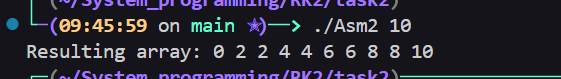

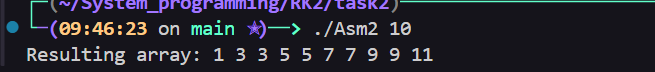